Ejercicio 5 - Regresion Logística con Keras

En este ejercicio, tu objetivo será entrenar modelos de Regresión Logística utilizando Keras (y Tensorflow como backend) para familiarizarte con la librería.



In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import utils
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Entrena un modelo de Regresión Logística con Keras para varios datasets



Podés elegir el dataset comentando/descomentando las líneas 9 a 17. Comentá todos los datasets salvo el que quieras usar.

Intenta obtener una buena performance en todos los casos. Prueba activando o no la normalización (últimas líneas) ¿Qué datasets no puede aprender el modelo?

In [17]:
import tensorflow as tf
import keras
import numpy as np
import utils 
import os
import matplotlib.pyplot as plt

In [18]:
def plot_curve(history, ind):
# summarize history for loss
    plt.plot(history.history[ind])
    # plt.plot(history.history['val_loss'])
    plt.title(f'model {ind}')
    plt.ylabel(ind)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [19]:
rtas = pd.read_csv('ejercicio5.csv')
rtas = rtas.fillna(0).set_index('archivos')
rtas

,entrada,clases,accuracy,acc_epoca,loss,epocas,tasa
archivos,,,,,,,
2_clases_simple.csv,2.0,2.0,1.000000,14.0,0.239253,1000.0,0.001
6_clases_dificil.csv,2.0,6.0,0.934000,956.0,0.396438,1000.0,0.001
circulos.csv,2.0,2.0,0.536667,198.0,0.693204,1000.0,0.001
diabetes.csv,8.0,2.0,0.784000,209.0,0.478726,1000.0,0.001
iris.csv,4.0,3.0,0.913333,999.0,0.319378,1000.0,0.001
moons_mis-scaled.csv,2.0,2.0,0.870000,915.0,0.274280,1000.0,0.001
moons.csv,2.0,2.0,0.870000,271.0,0.314537,1000.0,0.001


In [20]:
# Selección del dataset; descomenta el que quieras usar
# Datasets en 2D
#dataset = "2_clases_simple.csv"
#dataset = "6_clases_dificil.csv"
#dataset = "moons.csv"
#dataset = "moons_mis-scaled.csv"
dataset = "circulos.csv"

# Dataset con más de 2 dimensiones
# dataset = "iris.csv"
# dataset = "diabetes.csv"

In [21]:
# Carga del dataset
dataset_path=os.path.join("datasets_clasificacion", dataset)
data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
x,y=data[:,0:-1],data[:,-1]

# cantidad de ejemplos y dimension de entrada
n,d_in=x.shape

# calcula la cantidad de clases
classes=int(y.max()+1)

In [22]:
alpha = 0.001 #tasa
opt = keras.optimizers.SGD #optimizador
epocas = 1000 #epocas

In [23]:
print("Información del conjunto de datos:")
print(f'Dataset: {dataset}')
print(f"Ejemplos: {n}")
print(f"Variables de entrada: {d_in}")
print(f"Cantidad de clases: {classes}")

Información del conjunto de datos:
Dataset: circulos.csv
Ejemplos: 300
Variables de entrada: 2
Cantidad de clases: 2


In [24]:
# Normalizo las variables de entrada
for i in range(d_in):
    x[:,i]=(x[:,i]-x[:,i].mean())/x[:,i].std()

In [25]:
# Creación del modelo inicial
print("Inicialización aleatoria del modelo (podes volver a correr esta celda para obtener otros resultados)")

layer = keras.layers.Dense(classes,input_shape=(d_in,), activation='softmax')
# Creo un modelo logístico
modelo = keras.Sequential([layer])

Inicialización aleatoria del modelo (podes volver a correr esta celda para obtener otros resultados)


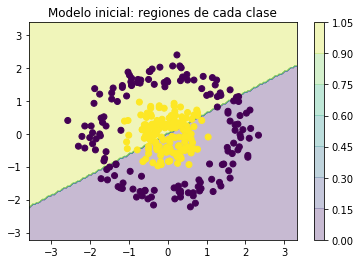

In [26]:
# visualización del modelo inicial (si hay solo 2 variables de entrada)
if d_in==2:
    utils.plot_regresion_logistica2D(modelo,x,y,title=f"Modelo inicial",detail=0.05)

In [27]:
modelo.compile(
  optimizer=opt(lr=alpha), 
  loss='sparse_categorical_crossentropy', 
  # metricas para ir calculando en cada iteracion o batch 
  # Agregamos el accuracy del modelo
  metrics=['accuracy'], 
)

In [46]:
# Entrenamiento del modelo
callbacks = [keras.callbacks.EarlyStopping(monitor='loss', patience=2)]
history = modelo.fit(x, y, 
                     epochs=epocas, 
                     batch_size=16, 
                     verbose=0, 
                   #  callbacks = callbacks
                     validation_split=0.3
            )

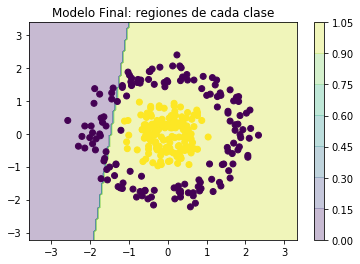

In [47]:
# visualización del modelo final (si hay solo 2 variables de entrada)
if d_in==2:
    utils.plot_regresion_logistica2D(modelo,x,y,title=f"Modelo Final",detail=0.05)

In [48]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

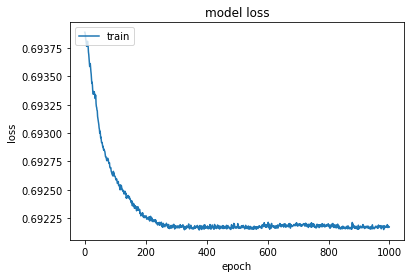

In [49]:
plot_curve(history, 'loss')

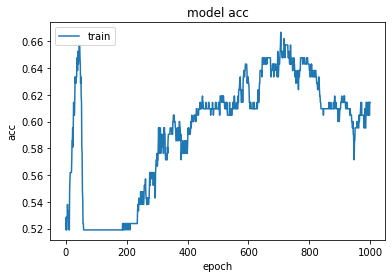

In [50]:
plot_curve(history, 'acc')

In [51]:
print(history.history.keys()), modelo.evaluate(x,y)

In [52]:
acc = pd.Series(history.history['acc'])
acc.idxmax(), acc.max()

(706, 0.6666666666666666)

In [39]:
loss = pd.Series(history.history['loss'])
change_loss = loss.pct_change()

In [40]:
mean_change_loss = change_loss.mean()

In [41]:
loss.iloc[acc.idxmax()], loss.min(), loss.idxmin()

(0.7553824098904928, 0.6929079794883728, 955)

In [42]:
rtas.loc[dataset] = d_in, classes, acc.max(), acc.idxmax(), loss.iloc[acc.idxmax()], epocas, alpha
rtas.loc[dataset]

 entrada         2.000000
 clases          2.000000
 accuracy        0.540000
 acc_epoca      19.000000
 loss            0.755382
 epocas       1000.000000
 tasa            0.001000
Name: circulos.csv, dtype: float64

In [43]:
rtas

,entrada,clases,accuracy,acc_epoca,loss,epocas,tasa
archivos,,,,,,,
2_clases_simple.csv,2.0,2.0,1.000000,14.0,0.239253,1000.0,0.001
6_clases_dificil.csv,2.0,6.0,0.934000,956.0,0.396438,1000.0,0.001
circulos.csv,2.0,2.0,0.540000,19.0,0.755382,1000.0,0.001
diabetes.csv,8.0,2.0,0.784000,209.0,0.478726,1000.0,0.001
iris.csv,4.0,3.0,0.913333,999.0,0.319378,1000.0,0.001
moons_mis-scaled.csv,2.0,2.0,0.870000,915.0,0.274280,1000.0,0.001
moons.csv,2.0,2.0,0.870000,271.0,0.314537,1000.0,0.001


In [44]:
w, b = modelo.get_weights()
w

array([[-0.6887911 , -0.7292229 ],
       [ 0.72603184,  0.7047829 ]], dtype=float32)

- dataset 3: no es un problema linealmente separable. en 270 iteraciones lllegamos a un umbral de accuracy, es decir estamos overfitteando el modelo 800 iteraciones más. 

- dataset 4: nuevamente no es linealmente separable. Ahora tenemos los puntos sin escala, lo que conlleva mucho más tiempo para la optimización por gradiente. (es el mismo que el 3 pero sin escalar

- dataset 5: es un circulo y es linealmente separable pero con features polinómicas. podríamos hacer trampa y generar features polinómicas o agregar capas a nuestra red. Con problemas lineales, este modelo tiene muy baja performance. (50% accuracy).

- dataset 6: iris. el modelo parece tener una buena performance 91% con un error de 0.31. El problema que parece que aún le falta entrenar más (llegó a la epoca 1000 y seguía mejorando).

- dataset 7: diabetes: el modelo tiene una baja performance (78%), la cual nos acercamos demasiado pronto (epoca 200). las 800 iteraciones siguientes el modelo sobreajusta. El error es de 0.47. Seguramente este modelo se puede mejorar con features polinómicas.

además de sobreajustar, estos modelos seguramente no estén generalizando. No veo que sea parte de este apartado, pero seguramente no lo esté haciendo.  (tendríamos que tener un set de validación y otro de test y gráficar la learning curve). 

In [343]:
# guardamos las respuestas: 
rtas.to_csv('ejercicio5.csv')